In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
diabetes_012_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the CSV file
diabetes_012_health_indicators_BRFSS2015 = pd.read_csv(diabetes_012_health_indicators_BRFSS2015)
diabetes_binary_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_health_indicators_BRFSS2015)
diabetes_binary_5050split_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_5050split_health_indicators_BRFSS2015)

In [3]:
df = diabetes_binary_5050split_health_indicators_BRFSS2015
# df = diabetes_binary_health_indicators_BRFSS2015
df = df.sample(len(df))

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
13210,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,7.0
23218,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,30.0,26.0,0.0,0.0,5.0,5.0,6.0
15436,0.0,1.0,0.0,1.0,22.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,1.0,12.0,4.0,4.0
55989,1.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0
12403,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,5.0,4.0


## Distribution

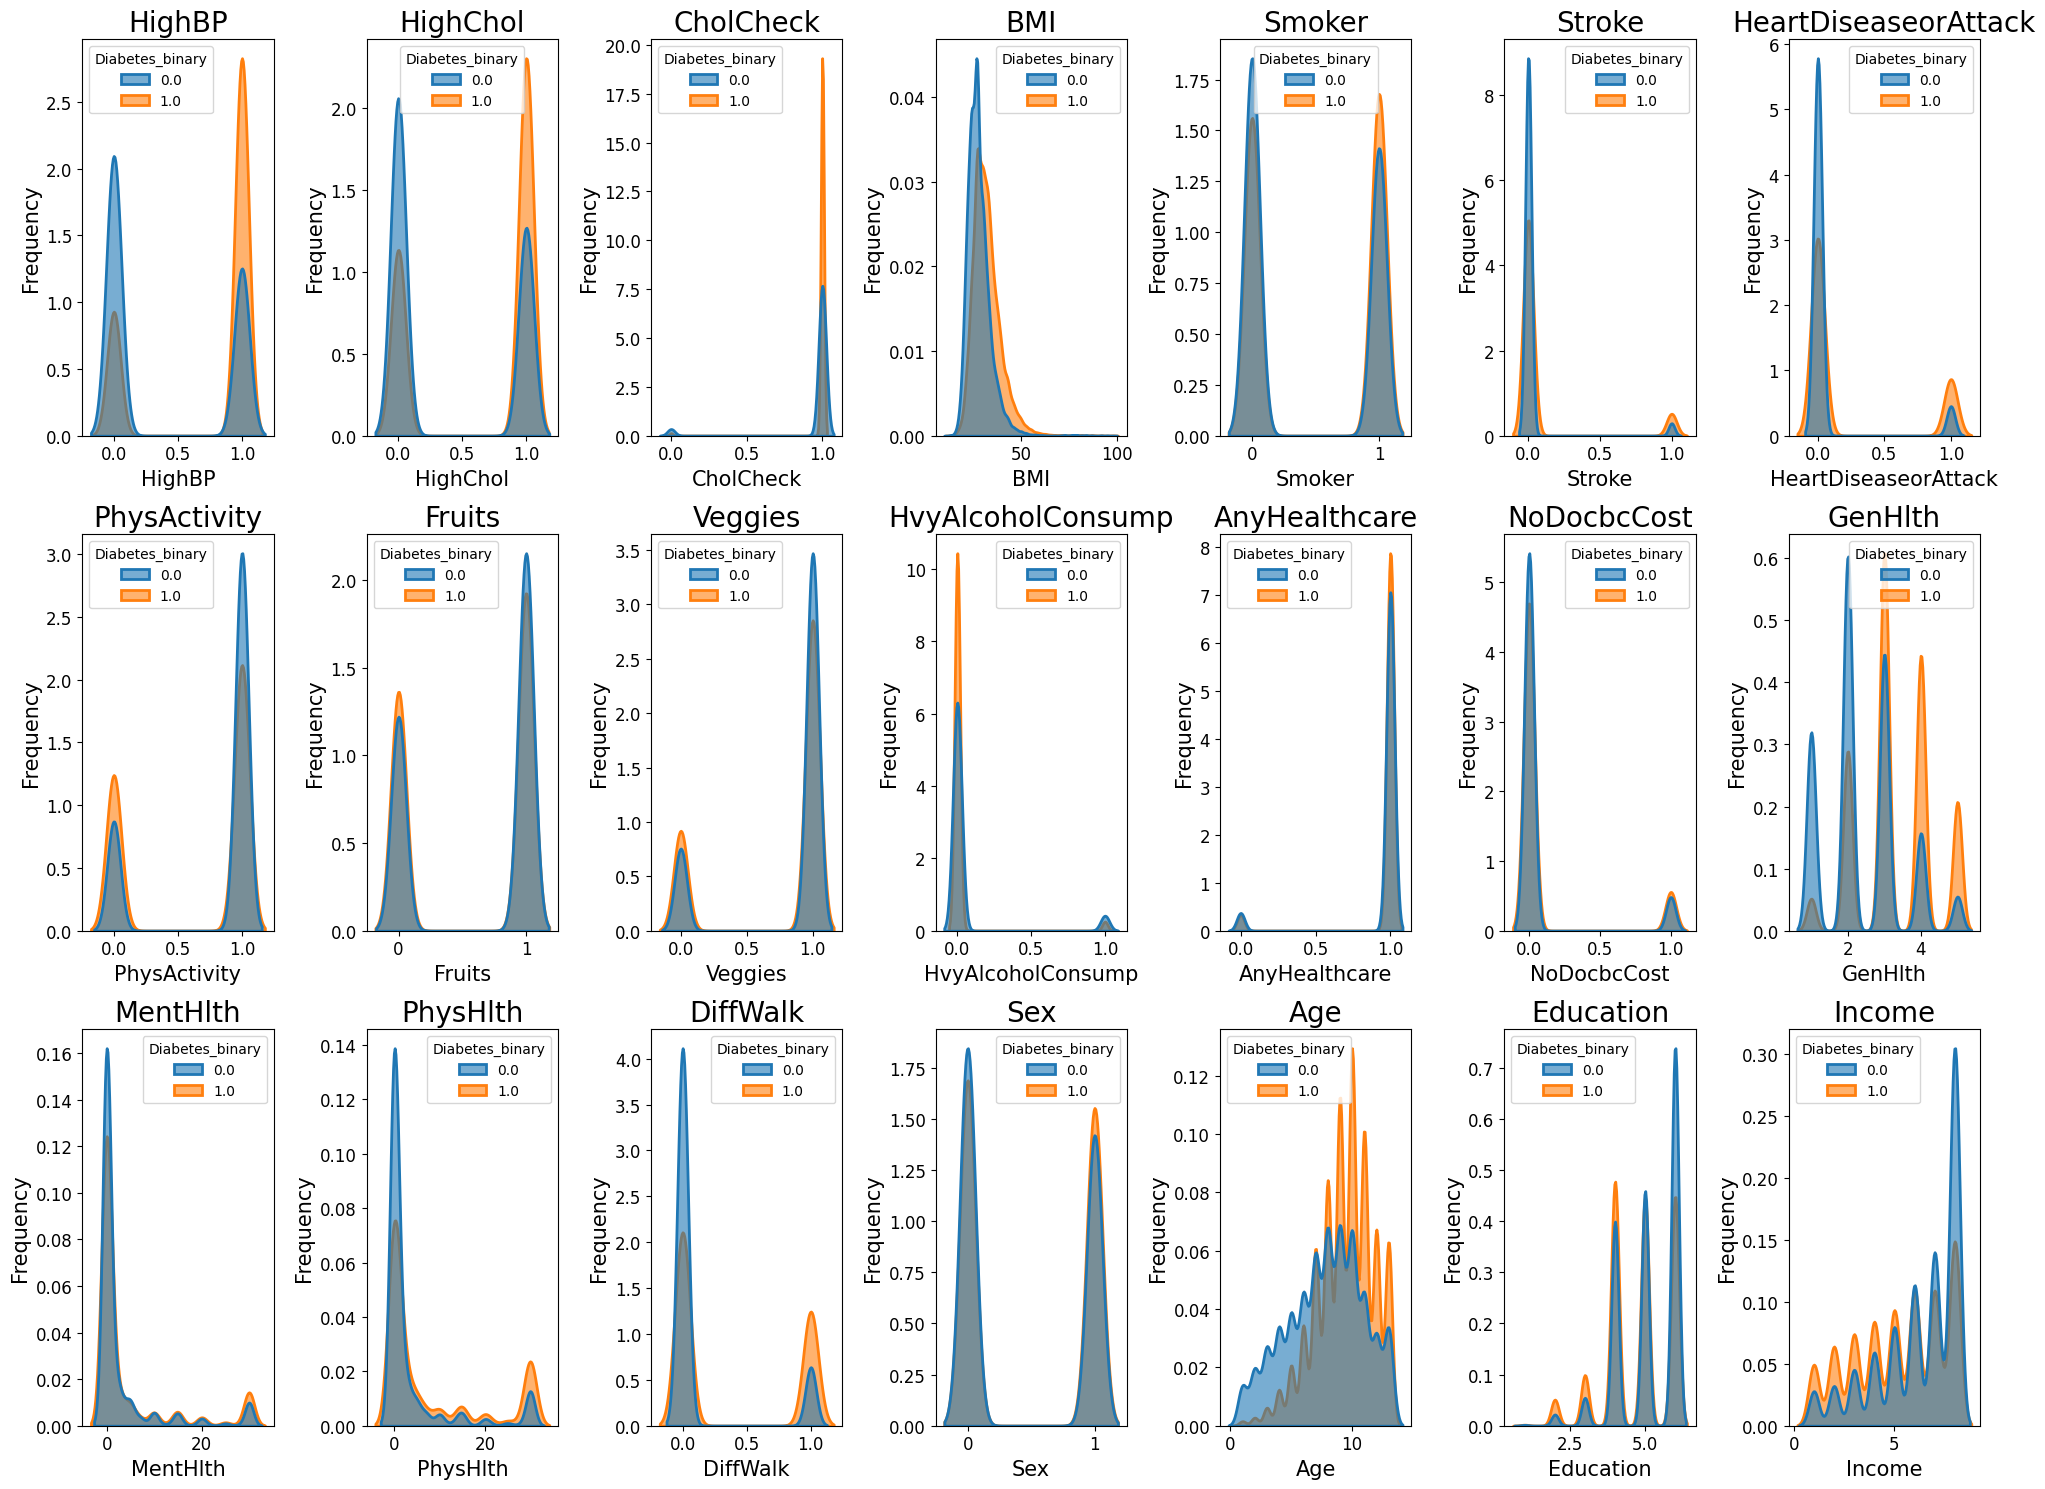

In [4]:
# Set figure size
plt.figure(figsize=(20, 15))

# Create histograms for each feature with 'hue' to differentiate by class
for i, column in enumerate(X.columns):
    plt.subplot(3, 7, i+1)  # Adjust the subplot position
    sns.kdeplot(data=df, x=column, hue='Diabetes_binary', fill=True, alpha=0.6, linewidth=2)
    
    # Adjust labels and title for each subplot
    plt.title(f'{column}', fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

## Interactions

In [5]:
# Create a pairplot to visualize the interactions between features
# sns.pairplot(df, hue='Diabetes_binary', palette="Set1", plot_kws={'alpha': 0.5})
# plt.show()

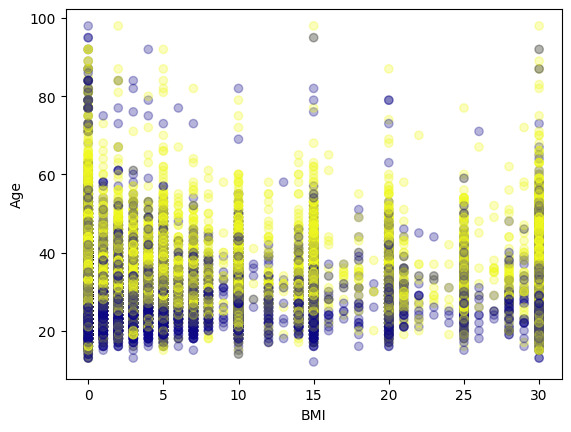

In [6]:
plt.scatter(
    df['MentHlth'],
    df['BMI'],
    c=df['Diabetes_binary'], 
    cmap='plasma',
    alpha=0.3
)
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

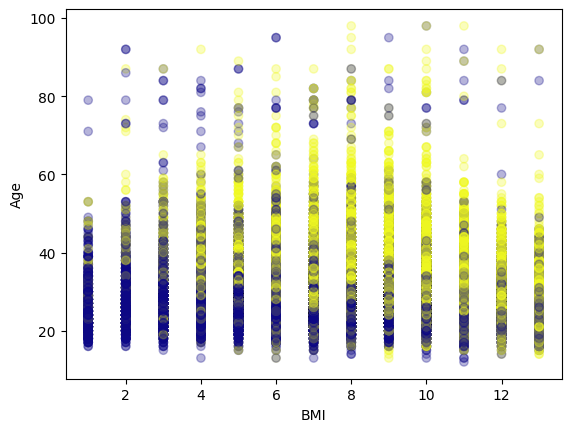

In [7]:
plt.scatter(
    df['Age'],
    df['BMI'],
    c=df['Diabetes_binary'], 
    cmap='plasma',
    alpha=0.3
)
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

### Age vs Diabetes

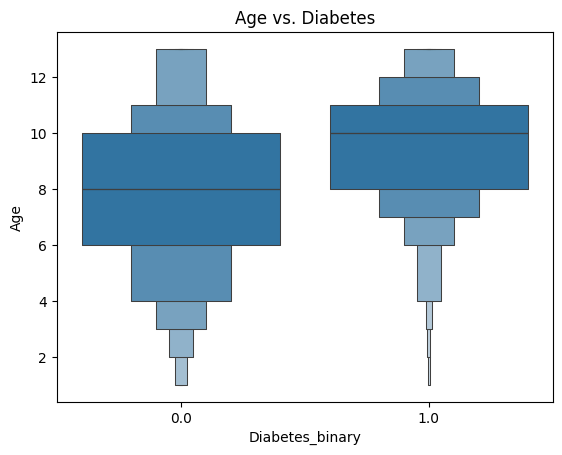

In [8]:
import seaborn as sns
age_diabetes = sns.boxenplot(x='Diabetes_binary', y='Age', data=df)
plt.title("Age vs. Diabetes")
plt.show()

### BMI vs. Diabetes

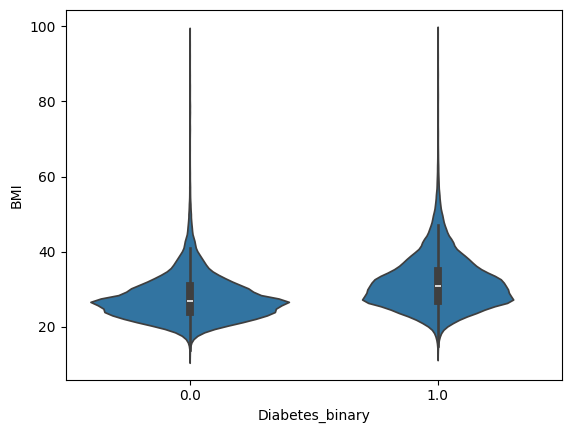

In [9]:
bmi_diabetes = sns.violinplot(x='Diabetes_binary', y='BMI', data=df)

plt.show()

### Smoker vs Diabetes

In [10]:
pd.crosstab(df['Diabetes_binary'], df['Smoker'])

Smoker,0.0,1.0
Diabetes_binary,,
0.0,20065,15281
1.0,17029,18317


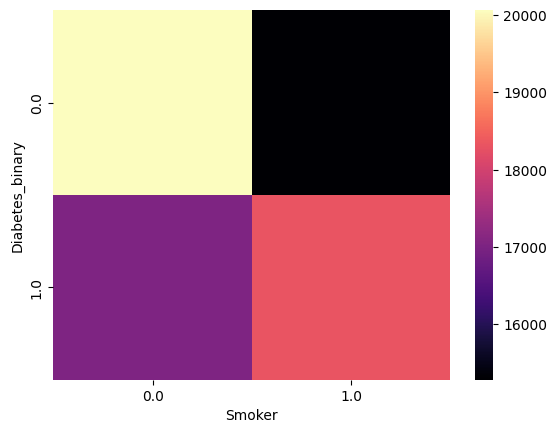

In [11]:
smoker_diabetes = sns.heatmap(pd.crosstab(df['Diabetes_binary'], df['Smoker']), cmap='magma')
plt.show()

### Sex vs. Diabetes

In [12]:
pd.crosstab(df['Diabetes_binary'], df['Sex'])

Sex,0.0,1.0
Diabetes_binary,,
0.0,19975,15371
1.0,18411,16935


### HighBP vs Diabetes

In [13]:
pd.crosstab(df['Diabetes_binary'], df['HighBP'])

HighBP,0.0,1.0
Diabetes_binary,,
0.0,22118,13228
1.0,8742,26604


### Mental Health vs Diabetes

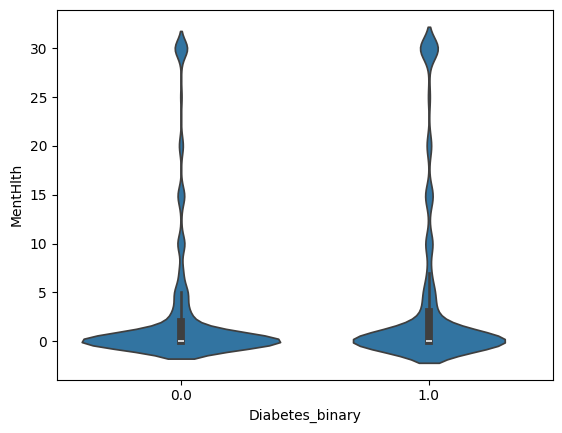

In [14]:
mentalhealth_diabetes = sns.violinplot(x='Diabetes_binary', y='MentHlth', data=df)


### Physical health

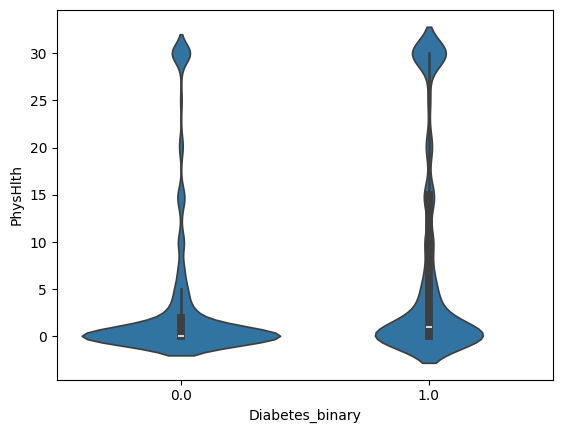

In [15]:
physical_diabetes = sns.violinplot(x='Diabetes_binary', y='PhysHlth', data=df)

### Income vs Diabetes

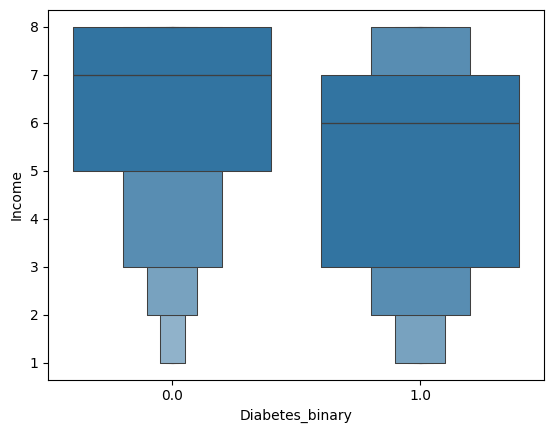

In [16]:
income_diabetes = sns.boxenplot(x='Diabetes_binary', y='Income', data=df)

### Education vs Diabetes

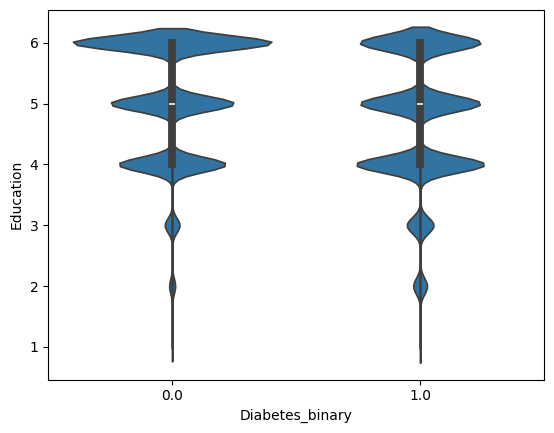

In [17]:
education_diabetes = sns.violinplot(x='Diabetes_binary', y='Education', data=df)

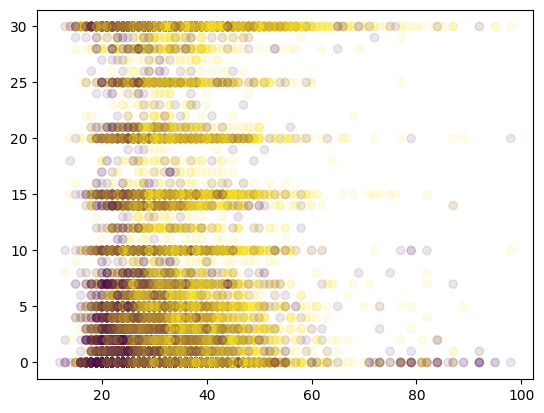

In [18]:
plt.scatter(df['BMI'], df['PhysHlth'], c=df['HighBP'], alpha=0.1)
plt.show()

## Data Preprocessing

In [19]:
for col in df.columns: 
    print(f"{col}: {df[col].unique()}")

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [1. 0.]
BMI: [23. 29. 22. 24. 28. 26. 32. 30. 25. 49. 27. 42. 39. 33. 37. 21. 36. 87.
 35. 45. 31. 40. 19. 43. 34. 20. 41. 59. 52. 47. 46. 51. 38. 44. 17. 48.
 18. 50. 54. 71. 13. 60. 57. 58. 15. 16. 81. 53. 61. 56. 62. 82. 55. 63.
 70. 75. 72. 73. 64. 79. 95. 92. 14. 84. 68. 77. 67. 69. 98. 66. 89. 65.
 74. 83. 85. 80. 76. 86. 78. 12.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [1. 0.]
Fruits: [1. 0.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [3. 4. 5. 1. 2.]
MentHlth: [ 0. 30.  5. 10. 20.  7.  2.  3. 15.  1. 25.  4. 12.  9. 14.  6. 28. 18.
 29.  8. 16. 24. 21. 27. 26. 17. 22. 13. 11. 23. 19.]
PhysHlth: [ 0. 26. 30. 20. 25.  2.  3.  7.  1. 14. 15.  4. 23. 10.  5. 21. 12.  8.
 28. 22.  6. 16. 19. 27.  9. 13. 29. 18. 17. 24. 11.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 9.  5. 12. 10.  6. 11.  8. 13.  2.  7.  1.  3.  4.]
Education: [4

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = [col for col in X.columns if len(X[col].unique()) == 2]
num_cols = [col for col in X.columns if col not in cat_cols]

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

preprocessor.fit(X)
X_scaled = preprocessor.transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=preprocessor.get_feature_names_out())

## Correlation

<Axes: >

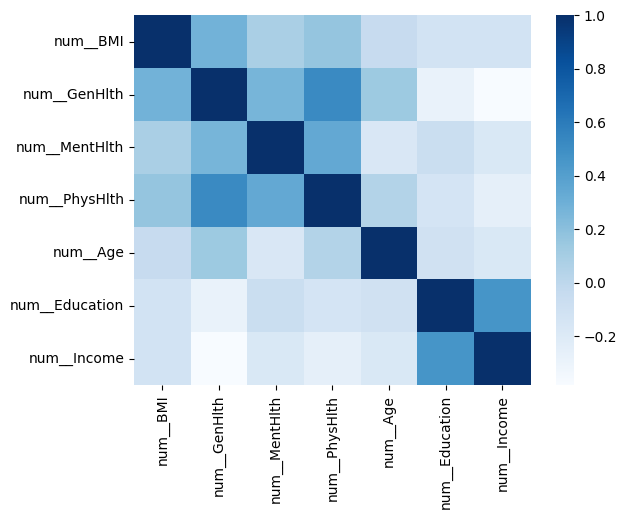

In [21]:
sns.heatmap(df_scaled[[col for col in df_scaled.columns if col.startswith('num')]].corr(method='spearman'), cmap='Blues')

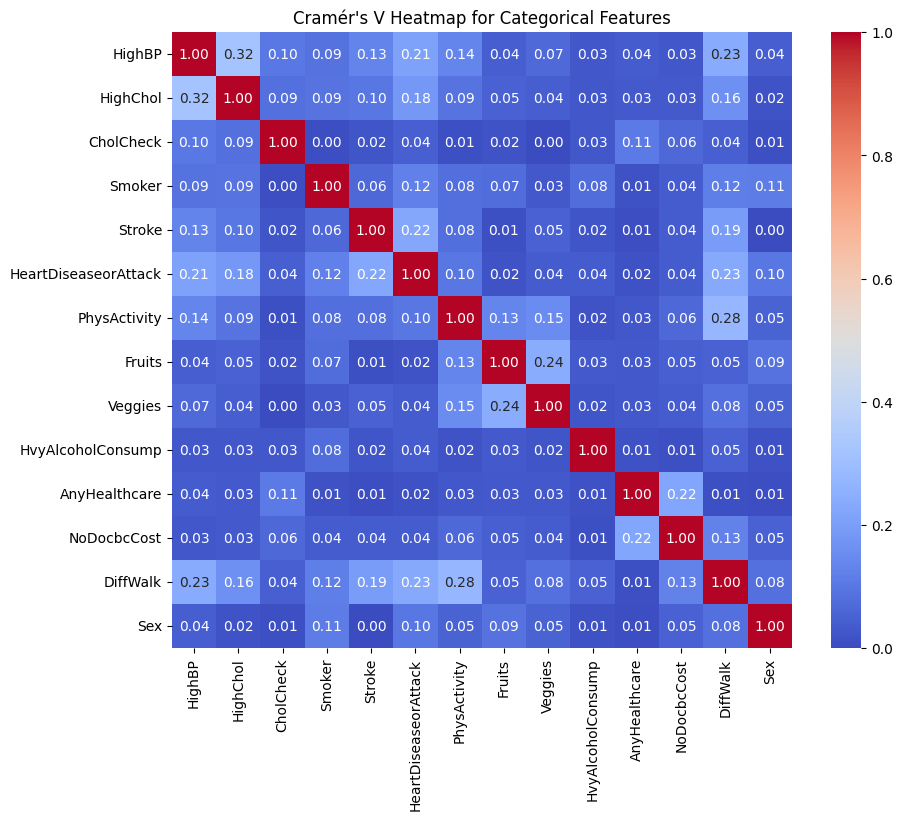

In [22]:
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

# Example dataframe with categorical columns
df_categorical = df[cat_cols]

# Compute the Cramér's V matrix
cramersv_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramersv_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# Convert to float for proper heatmap rendering
cramersv_matrix = cramersv_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramersv_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

## Dimensionality Reduction

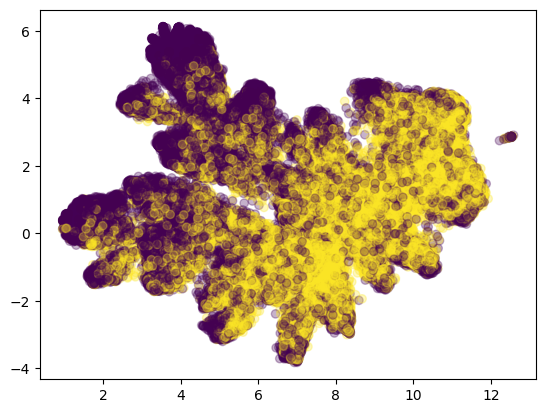

In [23]:
from umap import UMAP

umap_model = UMAP(n_neighbors=300)
X_umap = umap_model.fit_transform(X_scaled)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, alpha=0.3)
plt.show()

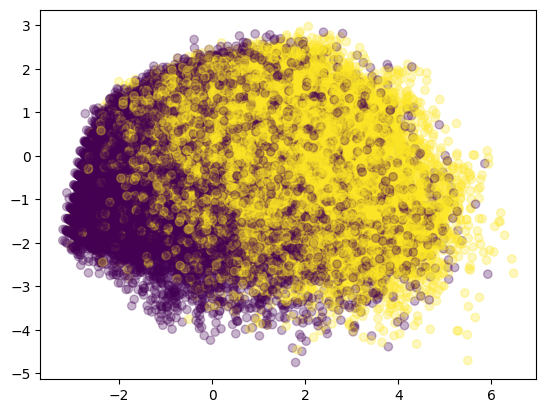

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.3)
plt.show()

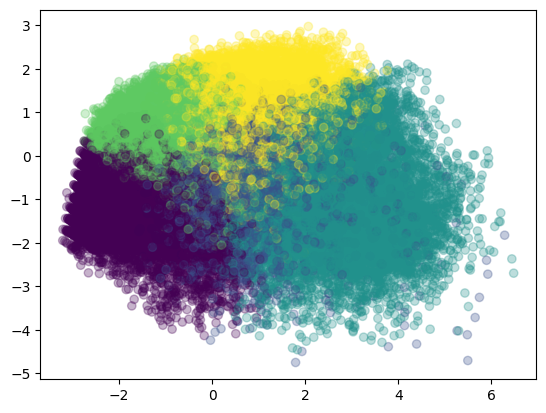

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, alpha=0.3)
plt.show()

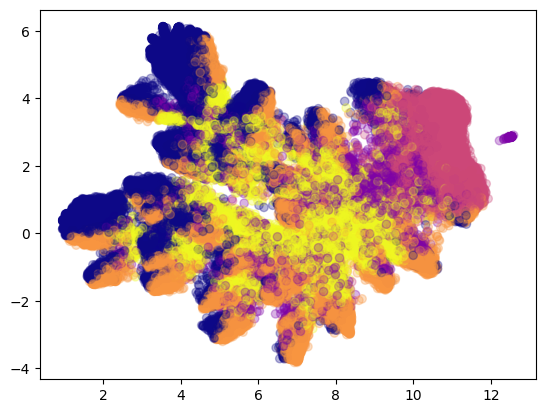

In [26]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans, alpha=0.3, cmap='plasma')
plt.show()